In [1]:
import torch
import time
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device
from snn_delays.utils.test_behavior import tb_minimal

device = get_device()

# for reproducibility
torch.manual_seed(10)

'''
Remarks:
- experimenting with crop_to: this add different time-axis compression, should help with the generalization problem
'''

dataset = 'shd'
total_time = 50
batch_size = 1024


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


With crop to, log-uniform, 71%

In [2]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 39.75 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 11.92 seconds


Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=700, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=3072, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=20, bias=False)
    )
  )
)
Epoch [1/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 19.61321
Step [4/7], Loss: 15.78165
Step [6/7], Loss: 27.93323
Step [8/7], Loss: 24.76394
Time elasped: 3.717446804046631
2264
Test Loss: 24.161663055419922
Avg spk_count per neuron for all 50 time-steps 614.3803003533569
Test Accuracy of the model on the test samples: 4.638

max acc: 4.637809187279152
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 19.78345
Step [4/7], Loss: 22.11491
Step [6/7], Loss: 18.54785
Step [8/7], Loss: 19.92485
Time 

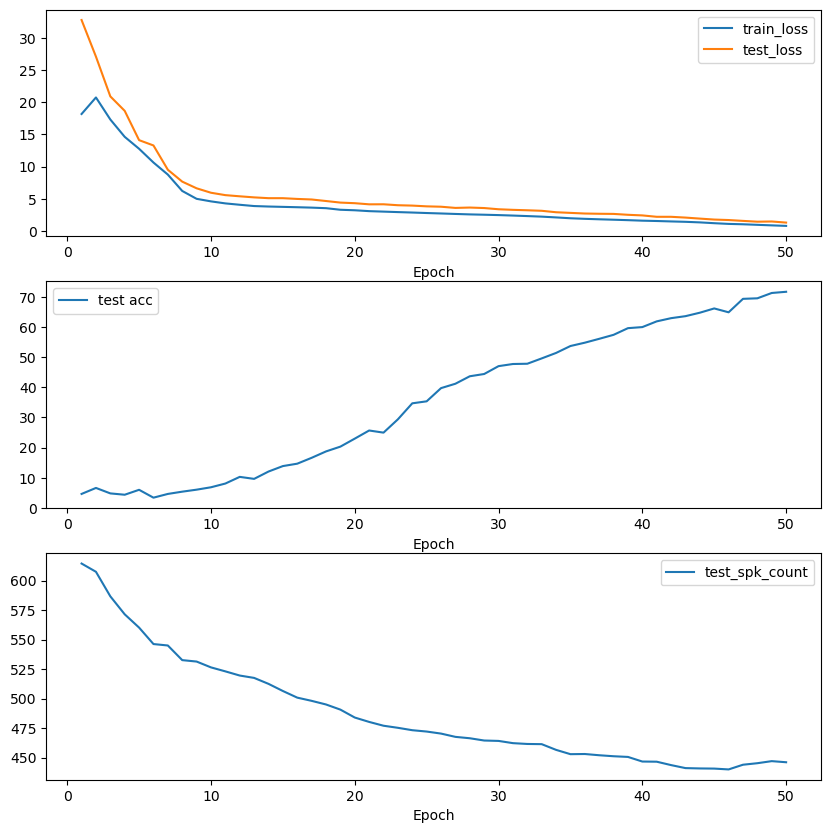

In [6]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'log-uniform'
# structure = (64, 3, 'd')
# extra_kwargs = {'delay_range':(48, 16)}

structure = (64, 2, 'd')
extra_kwargs = {'delay_range':(48, 1),
                'pruned_delays': 3}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.set_layers()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_minimal, scheduler=(10, 0.95), test_every=1, freeze_taus = True)


With crop, short, normal tau, 85%

Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=700, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=3072, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=20, bias=False)
    )
  )
)
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 3.41296
Step [4/7], Loss: 3.25338
Step [6/7], Loss: 3.27779
Step [8/7], Loss: 3.17684
Time elasped: 3.263338327407837
2264
Test Loss: 3.1775523026784263
Avg spk_count per neuron for all 50 time-steps 505.2996908127208
Test Accuracy of the model on the test samples: 6.758

max acc: 6.757950530035336
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 3.13582
Step [4/7], Loss: 3.10759
Step [6/7], Loss: 3.04282
Step [8/7], Loss: 3.01464
Time elasped: 2.2436330318450928
2264
Test Loss: 3.0101610819498696
Avg spk_count per neuron for all 50 time-steps 491.2014134275618
Test Accuracy of the model on the test samples: 12.367

max acc: 12.36749116607774
Epoch [3/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 3.00527
Step [4/7], Loss: 2.96118
Step [6/7], Loss: 2.94272
Step [8/7], Loss: 2.94236
Time elasped: 2.179352045059204
2264
Test Loss: 2.880608399709066
Avg spk_count per neuron for all 50 time-steps 462.8911219081272
Test Accuracy of the model on t

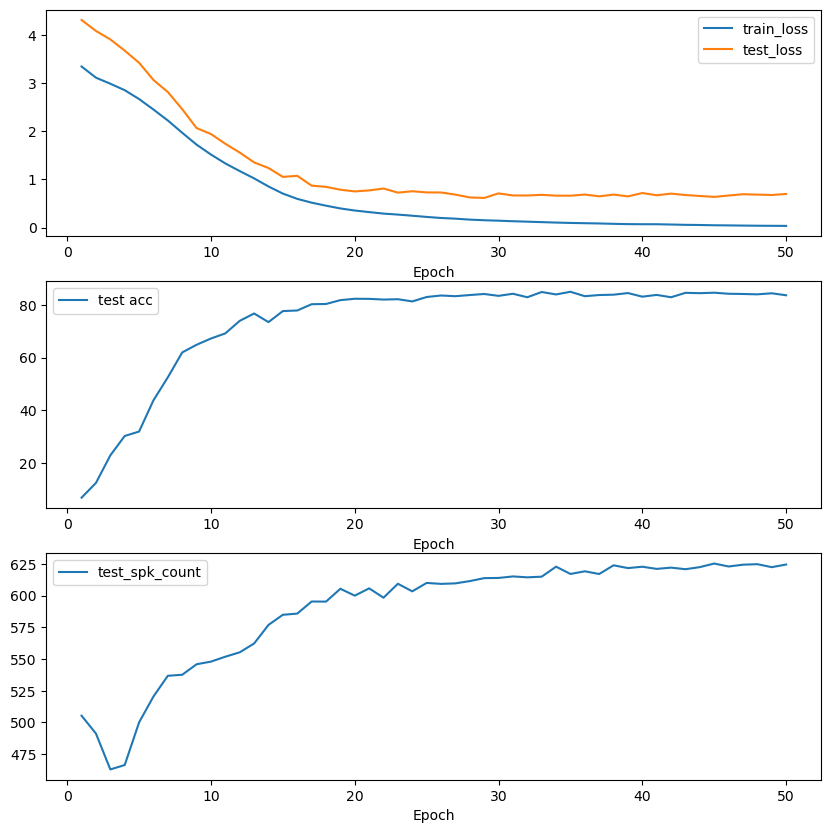

In [3]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'normal'
# structure = (64, 3, 'd')
# extra_kwargs = {'delay_range':(48, 16)}

structure = (64, 2, 'd')
extra_kwargs = {'delay_range':(48, 1),
                'pruned_delays': 3}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.set_layers()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_minimal, scheduler=(10, 0.95), test_every=1, freeze_taus = True)


Without crop to, log-normal, 78%

In [7]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 39.69 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 10.62 seconds


SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=700, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=3072, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=20, bias=False)
    )
  )
)
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 17.85881
Step [4/7], Loss: 17.71689
Step [6/7], Loss: 23.09762
Step [8/7], Loss: 14.60460
Time elasped: 2.717359781265259
2264
Test Loss: 15.677554766337076
Avg spk_count per neuron for all 50 time-steps 601.6492932862191
Test Accuracy of the model on the test samples: 4.505

max acc: 4.5053003533568905
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 14.94947
Step [4/7], Loss: 15.32336
Step [6/7], Loss: 10.16338
Step [8/7], Loss: 8.66800
Time elasped: 2.7814738750457764
2264
Test Loss: 7.445900599161784
Avg spk_count per neuron for all 50 time-steps 606.7087014134275
Test Accuracy of the model on the test samples: 6.316

max acc: 6.31625441696113
Epoch [3/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 6.96315
Step [4/7], Loss: 5.58076
Step [6/7], Loss: 6.00597
Step [8/7], Loss: 5.36479
Time elasped: 2.762303113937378
2264
Test Loss: 5.433168411254883
Avg spk_count per neuron for all 50 time-steps 610.8403268551236
Test Accuracy of the model

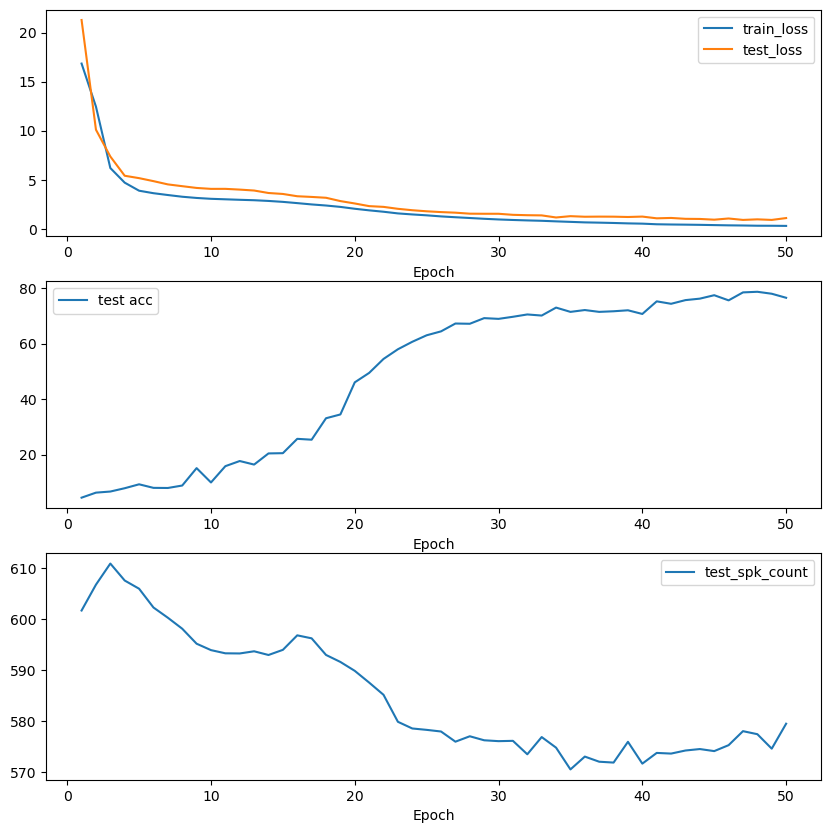

In [8]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'log-uniform'
# structure = (64, 3, 'd')
# extra_kwargs = {'delay_range':(48, 16)}

structure = (64, 2, 'd')
extra_kwargs = {'delay_range':(48, 1),
                'pruned_delays': 3}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.set_layers()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_minimal, scheduler=(10, 0.95), test_every=1, freeze_taus = True)


Without crop-to, short normal tau, 83%

In [5]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 45.71 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 12.98 seconds


Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=700, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=3072, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=20, bias=False)
    )
  )
)
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 3.23974
Step [4/7], Loss: 3.04877
Step [6/7], Loss: 2.99944
Step [8/7], Loss: 2.90300
Time elasped: 2.6763229370117188
2264
Test Loss: 2.8502866427103677
Avg spk_count per neuron for all 50 time-steps 249.1225706713781
Test Accuracy of the model on the test samples: 15.680

max acc: 15.680212014134275
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 2.79137
Step [4/7], Loss: 2.68551
Step [6/7], Loss: 2.59361
Step [8/7], Loss: 2.52522
Time elasped: 2.7381644248962402
2264
Test Loss: 2.327760855356852
Avg spk_count per neuron for all 50 time-steps 363.94257950530033
Test Accuracy of the model on the test samples: 31.670

max acc: 31.669611307420496
Epoch [3/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 2.37696
Step [4/7], Loss: 2.22179
Step [6/7], Loss: 2.16034
Step [8/7], Loss: 2.01996
Time elasped: 2.8151602745056152
2264
Test Loss: 1.9025933742523193
Avg spk_count per neuron for all 50 time-steps 427.90856890459366
Test Accuracy of the mod

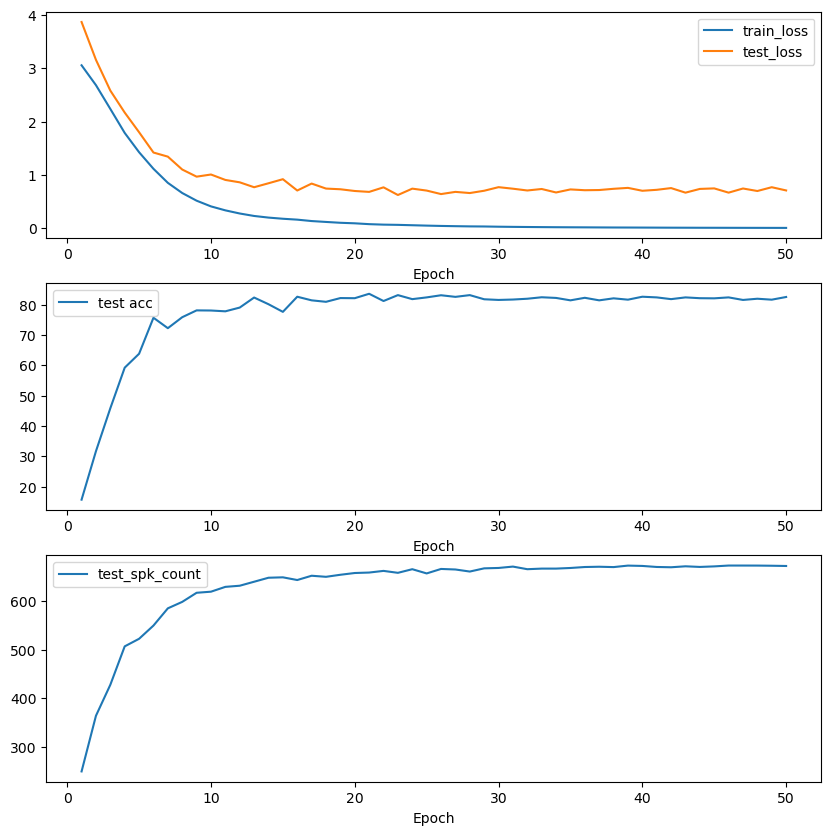

In [7]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'normal'
# structure = (64, 3, 'd')
# extra_kwargs = {'delay_range':(48, 16)}

structure = (64, 2, 'd')
extra_kwargs = {'delay_range':(48, 1),
                'pruned_delays': 3}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device, 
          **extra_kwargs)

dataset_dict['time_ms'] = 1e3

snn.set_layers()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_minimal, scheduler=(10, 0.95), test_every=1, freeze_taus = True)
